In [1]:
import gym
import numpy as np
import time

In [2]:
env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

In [3]:
STATES

16

In [4]:
ACTIONS

4

In [5]:
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [7]:
EPISODES = 3000 
MAX_STEPS = 100 
LEARNING_RATE = 0.81  
GAMMA = 0.96
RENDER = False
epsilon = 0.9

In [8]:
rewards = []
for episode in range(EPISODES):

   
  state = env.reset()
  for _ in range(MAX_STEPS):  
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      #Random action in Envr.
      action = env.action_space.sample()  
    else:
      #Next state of agent
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)
    

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")

[[2.47483904e-01 1.23422381e-02 1.14012672e-02 1.24481717e-02]
 [7.05590125e-03 4.92162975e-03 2.07115204e-03 1.83088320e-01]
 [3.49772878e-03 2.38099701e-03 5.41235128e-03 1.64853562e-01]
 [4.24700168e-03 3.65526726e-03 1.53728791e-03 1.10563540e-01]
 [3.63153475e-01 2.92884556e-03 2.54959219e-03 1.71248670e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49856319e-01 3.00592948e-05 1.40975110e-05 5.26487981e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.09782830e-02 3.92737274e-03 3.89738858e-03 3.33663977e-01]
 [7.09065847e-03 6.38942079e-01 5.71741737e-03 8.94968024e-03]
 [1.92433771e-01 9.86770548e-04 6.20413451e-04 1.07124510e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.91737952e-02 2.93654750e-02 8.63890333e-01 3.32214274e-02]
 [6.97339789e-02 9.78899995e-01 5.97771209e-02 6.25896789e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

In [9]:
env.render()

  (Down)
SFFF
FHFH
FFFH
HFFG


In [10]:
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

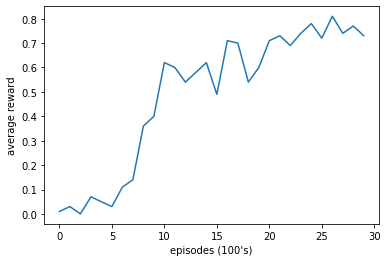

In [11]:
plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()